In [13]:
#tutorial a seguir: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#3importpackages


#tutorial de LDA con visualizaciones: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

 
#tutorial opcional:
#https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html#applying-the-lda-model

#Visualization of topics
#https://liferay.de.dariah.eu/tatom/topic_model_visualization.html
#diapositivas de lda2vec: https://www.slideshare.net/ChristopherMoody3/word2vec-lda-and-introducing-a-new-hybrid-algorithm-lda2vec?next_slideshow=1


#slides lda: https://vtechworks.lib.vt.edu/bitstream/handle/10919/81761/Clustering%20and%20Topic%20Analysis%20-%20Final%20Presentation.pdf?sequence=1&isAllowed=y


In [14]:
#!python -m spacy download en
#!pip install nltk
#!pip install unidecode

In [15]:
#!python -m spacy download es
#You can now load the model via spacy.load('es_core_news_sm')
#You can now load the model via spacy.load('es')


# Seleccionar idioma

In [16]:
idioma = 'english'

# Importar Librerias

In [17]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2021-04-04


In [18]:
import nltk; 
#nltk.download('stopwords')
import time


In [19]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from string import digits
from string import punctuation
import unidecode


In [20]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [21]:
import spacy


In [22]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [24]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [25]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words(idioma)
stop_words.extend(['linkremoved','amp', 'usernameremoved','link','removed', '<usernameremoved>','<linkremoved>','usernameremoved_usernameremoved','linkremoved_linkremoved'])
##stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
#stopwords

# Importar datos

In [27]:
path_data = "G:\\My Drive\\2019-1\\Tesis\\Topic Modeling\\LDA2VEC\\Data\\"


In [28]:
region = 'europe_english'

#full_english
#full_spanish
#northamerica_english
#asia_english
#europe_english
#latinamerica_spanish
#europe_spanish
name_file = ''
if region == 'full_english':
    name_file = 'English_tweets_geolocated_without_preprocess_text_20190411.csv'
elif region == 'full_spanish':
    name_file = 'Spanish_tweets_geolocated_without_preprocess_text_20190411.csv'
elif region == 'northamerica_english':
    name_file = 'english_northamerica_tweets_20190411.csv'
elif region == 'asia_english':
    name_file = 'english_asia_tweets_20190411.csv'
elif region == 'europe_english':
    name_file = 'english_europe_tweets_20190411.csv'
elif region == 'latinamerica_spanish':
    name_file = 'spanish_latinamerica_tweets_20190411.csv'
elif region == 'europe_spanish':
    name_file = 'spanish_europe_tweets_20190411.csv'
    

In [29]:
df = pd.read_csv(path_data+name_file,encoding='utf-8')

In [30]:
len(df)

111745

In [31]:
len(df)

111745

**Se usará la columna 'texto completo' para extraer los datos de los tweets**

In [32]:
pd.set_option('display.max_colwidth', -1)
df['texto_completo'] =  df['texto_completo'].str.lower()
df.head(10)

<ipython-input-32-3662fb1d5b04>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,created_at2,id,created_at,user.screen_name,user_location,coordinates,text,full_text,retweet_created_at,retweet_full_text,texto_completo,ubicacion_encontrada
0,2,2018-04-01,id-980480940567924736,Sun Apr 01 16:24:07 +0000 2018,CamHatch,"Rotterdam, The Netherlands",NaN,Meet our newest product: the transparent CamHatch webcam cover! We've combined everything you loved about the Matte https://t.co/ZHCUxIFlds,"Meet our newest product: the transparent CamHatch webcam cover! We've combined everything you loved about the Matte Black version with the transparency of Mark Zuckerberg. Protect your privacy without having to change the appearance of your laptop, tablet or smartphone. https://t.co/s9GbLf8tRG",NaN,NaN,"meet our newest product: the transparent camhatch webcam cover! we've combined everything you loved about the matte black version with the transparency of mark zuckerberg. protect your privacy without having to change the appearance of your laptop, tablet or smartphone. <link removed>",Netherlands
1,17,2018-04-01,id-980481203110281216,Sun Apr 01 16:25:09 +0000 2018,iky86,stoke on trent,NaN,"@SupportOurLefty This week has been the most #Triggered I've seen Lefties since Trump won (Sadly, we have #Maybot &amp; https://t.co/GPajHgkGur","@SupportOurLefty This week has been the most #Triggered I've seen Lefties since Trump won (Sadly, we have #Maybot &amp; Amber Dudd on other side) Friends! https://t.co/B9IOQD3FFB",NaN,NaN,"<usernameremoved> this week has been the most #triggered i've seen lefties since trump won (sadly, we have #maybot &amp; amber dudd on other side) friends! <link removed>",United Kingdom
2,43,2018-04-01,id-980480454846566401,Sun Apr 01 16:22:11 +0000 2018,MichaelJF80,"Liverpool, England",NaN,Pulitzer prize for this lady. Investigative journalism at it's finest. https://t.co/ojcRGpCQf4,NaN,NaN,NaN,pulitzer prize for this lady. investigative journalism at it's finest. <link removed>,United Kingdom
3,45,2018-04-01,id-980480424429400071,Sun Apr 01 16:22:04 +0000 2018,ruechids1,"Enfield, London",NaN,"Theres no more secrecy, confident and privacy and no protection of personal data. Our lives are traded on the open https://t.co/jSIOYGP0mu","Theres no more secrecy, confident and privacy and no protection of personal data. Our lives are traded on the open market! https://t.co/gVYQCH3qvJ",NaN,NaN,"theres no more secrecy, confident and privacy and no protection of personal data. our lives are traded on the open market! <link removed>",United Kingdom
4,51,2018-04-01,id-980480325083164673,Sun Apr 01 16:21:40 +0000 2018,Hugh_Macfarlane,"Glenrothes, Fife",NaN,AggregateIQ: the obscure Canadian tech firm and the Brexit data riddle https://t.co/nzEsS4mVbi,NaN,NaN,NaN,aggregateiq: the obscure canadian tech firm and the brexit data riddle <link removed>,United Kingdom
5,73,2018-04-01,id-980482011507908608,Sun Apr 01 16:28:22 +0000 2018,amasoliverdilme,Barcelona,NaN,80 Best Data Science Books That Are Worthy Reading https://t.co/ggd5ebEBLq #bigdata #datascience https://t.co/Pz20Aqe6HK,NaN,NaN,NaN,80 best data science books that are worthy reading <link removed> #bigdata #datascience <link removed>,Spain
6,77,2018-04-01,id-980482066977640449,Sun Apr 01 16:28:35 +0000 2018,tinchissy,united kingdom,NaN,You cant just go swanning around being *Hacked off* and expect us plebs to keep you up to date. Awake. That is wha https://t.co/7lJt54Tovb,You cant just go swanning around being *Hacked off* and expect us plebs to keep you up to date. Awake. That is what you need to be young man. AWAKE! We need you now. Put the champagne down. https://t.co/EmGYJ5qtmb,NaN,NaN,you cant just go swanning around being *hacked off* and expect us plebs to keep you up to date. awake. that is what you need to be young man. awake! we need you now. put the champagne down. <link removed>,United Kingdom
7,90,2018-04-01,id-980482108228501506,Sun Apr 01 16:28:45 +0000 2018,Tonybirte,"Antwerp, Belgium",NaN,Recommend everyone does this in the #FBPE community. 

# remove links

In [33]:
df['texto_completo'].replace({"http\S+": '<linkremoved>'}, inplace=True, regex=True)


In [34]:
df['texto_completo'].replace({"<link removed>": '<linkremoved>'}, inplace=True, regex=True)



In [35]:
df['texto_completo'].head()

0    meet our newest product: the transparent camhatch webcam cover! we've combined everything you loved about the matte black version with the transparency of mark zuckerberg. protect your privacy without having to change the appearance of your laptop, tablet or smartphone.  <linkremoved>
1    <usernameremoved> this week has been the most #triggered i've seen lefties since trump won (sadly, we have #maybot &amp; amber dudd  on other side) friends! <linkremoved>                                                                                                                   
2    pulitzer prize for this lady. investigative journalism at it's finest. <linkremoved>                                                                                                                                                                                                         
3    theres no more secrecy, confident and privacy and no protection of personal data. our lives are traded on the open market!

# remove usernames

In [36]:
df['texto_completo'].replace({"@[^\s]+": '<usernameremoved>'}, inplace=True, regex=True)

# remove duplicates

In [37]:
len(df)

111745

In [38]:
df.drop_duplicates(['texto_completo'],keep='first', inplace=True)

In [39]:
print("El numero de tweets no duplicados es", len(df)) #numero de tweets no duplicados

El numero de tweets no duplicados es 111695


In [40]:
# numero de usuarios
tweets_by_user_data = df.groupby('user.screen_name').agg('size').sort_values(ascending=False).reset_index()
print("El numero de usuarios es",len(tweets_by_user_data))

El numero de usuarios es 46918


# remove digits, puntuactions, symbols

In [41]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
punctuation+='¡¿'

In [43]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¡¿'

In [44]:
#Remove digits and puntuaction
remove_digits = str.maketrans(digits, ' '*len(digits))#remove_digits = str.maketrans('', '', digits)
remove_punctuation = str.maketrans(punctuation, ' '*len(punctuation))#remove_punctuation = str.maketrans('', '', punctuation)
remove_hashtags_caracter = str.maketrans('#', ' '*len('#'))
#las palabras de los hashtag se mantiene, pero no el simbolo. 

In [45]:
df['texto_completo'].head()

0    meet our newest product: the transparent camhatch webcam cover! we've combined everything you loved about the matte black version with the transparency of mark zuckerberg. protect your privacy without having to change the appearance of your laptop, tablet or smartphone.  <linkremoved>
1    <usernameremoved> this week has been the most #triggered i've seen lefties since trump won (sadly, we have #maybot &amp; amber dudd  on other side) friends! <linkremoved>                                                                                                                   
2    pulitzer prize for this lady. investigative journalism at it's finest. <linkremoved>                                                                                                                                                                                                         
3    theres no more secrecy, confident and privacy and no protection of personal data. our lives are traded on the open market!

In [46]:
#df['texto_completo'].replace({"ee.uu": 'eeuu'}, inplace=True, regex=True)


In [47]:
#a = df[df['texto_completo'].str.contains('ee.uu', regex = True)]

In [48]:
#len(a)+51

# Ojo, en Topic modeling no remuevo tildes. Solo lo hago en word embeddings

In [49]:
import unidecode

data = []
for tweet in df['texto_completo']:
    tweet = tweet.translate(remove_digits)
    #tweet = tweet.lower() it wasn't a good idea,, we lost a lot of
    tweet = tweet.translate(remove_punctuation)
    tweet = tweet.translate(remove_hashtags_caracter)
    tweet = tweet.lower()
    #tweet = unidecode.unidecode(tweet)  #esta linea se hacia en word embeddings
    #tweet = tweet.strip().split()
    #filtered_words = [word for word in tweet if word not in stopWords]
    #corpus[id_tweet]= filtered_words
    #id_tweet+=1
    data.append(tweet)


In [50]:
data[0:5]

['meet our newest product  the transparent camhatch webcam cover  we ve combined everything you loved about the matte black version with the transparency of mark zuckerberg  protect your privacy without having to change the appearance of your laptop  tablet or smartphone    linkremoved ',
 ' usernameremoved  this week has been the most  triggered i ve seen lefties since trump won  sadly  we have  maybot  amp  amber dudd  on other side  friends   linkremoved ',
 'pulitzer prize for this lady  investigative journalism at it s finest   linkremoved ',
 'theres no more secrecy  confident and privacy and no protection of personal data  our lives are traded on the open market   linkremoved ',
 'aggregateiq  the obscure canadian tech firm and the brexit data riddle  linkremoved ']

In [51]:
len(data)

111695

In [52]:
len(df)

111695

In [53]:
pprint(data[1])

(' usernameremoved  this week has been the most  triggered i ve seen lefties '
 'since trump won  sadly  we have  maybot  amp  amber dudd  on other side  '
 'friends   linkremoved ')


#  Twitter tokenizer

In [54]:
from nltk.tokenize import TweetTokenizer

In [55]:
tknzr = TweetTokenizer()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(tknzr.tokenize(sentence))


In [56]:
data_words = list(sent_to_words(data))
#0:27

In [57]:
print(data_words[1])

['usernameremoved', 'this', 'week', 'has', 'been', 'the', 'most', 'triggered', 'i', 've', 'seen', 'lefties', 'since', 'trump', 'won', 'sadly', 'we', 'have', 'maybot', 'amp', 'amber', 'dudd', 'on', 'other', 'side', 'friends', 'linkremoved']


In [58]:
print(data_words[4])

['aggregateiq', 'the', 'obscure', 'canadian', 'tech', 'firm', 'and', 'the', 'brexit', 'data', 'riddle', 'linkremoved']


In [59]:
print(data_words[5])

['best', 'data', 'science', 'books', 'that', 'are', 'worthy', 'reading', 'linkremoved', 'bigdata', 'datascience', 'linkremoved']


# Create brigram and trigram models

In [60]:
# Build the bigram and trigram models
#quizas el min count es muy bajo
#documentaicon de bigramas 
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#3importpackages
min_count = 5#int(len(df)*0.03)
bigram = gensim.models.Phrases(data_words, min_count=min_count) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], min_count =min_count)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['usernameremoved', 'this_week', 'has_been', 'the', 'most', 'triggered', 'i_ve_seen', 'lefties', 'since', 'trump_won', 'sadly', 'we', 'have', 'maybot', 'amp', 'amber', 'dudd', 'on', 'other_side', 'friends', 'linkremoved']


In [61]:
# See trigram example
#print(trigram_mod[bigram_mod[data_words[1]]])
for i in range(0,5):
    print(trigram_mod[bigram_mod[data_words[i]]])

['meet', 'our_newest', 'product', 'the', 'transparent', 'camhatch', 'webcam', 'cover', 'we_ve', 'combined', 'everything', 'you', 'loved', 'about', 'the', 'matte', 'black', 'version', 'with', 'the', 'transparency', 'of', 'mark_zuckerberg', 'protect_your_privacy', 'without_having', 'to', 'change', 'the', 'appearance', 'of', 'your', 'laptop', 'tablet', 'or', 'smartphone', 'linkremoved']
['usernameremoved', 'this_week', 'has_been', 'the', 'most', 'triggered', 'i_ve_seen', 'lefties', 'since', 'trump_won', 'sadly', 'we', 'have', 'maybot', 'amp', 'amber', 'dudd', 'on', 'other_side', 'friends', 'linkremoved']
['pulitzer', 'prize', 'for', 'this', 'lady', 'investigative_journalism', 'at', 'it', 's', 'finest', 'linkremoved']
['theres_no', 'more', 'secrecy', 'confident', 'and', 'privacy', 'and', 'no', 'protection', 'of', 'personal_data', 'our_lives', 'are', 'traded', 'on', 'the', 'open', 'market', 'linkremoved']
['aggregateiq', 'the', 'obscure_canadian_tech', 'firm', 'and', 'the', 'brexit_data_rid

# Remove Stopwords, Make Bigrams and Lemmatize

In [62]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [63]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [64]:
#%pprint

In [65]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)#0:33


In [66]:
data_words_nostops[0]

['meet',
 'newest',
 'product',
 'transparent',
 'camhatch',
 'webcam',
 'cover',
 'combined',
 'everything',
 'loved',
 'matte',
 'black',
 'version',
 'transparency',
 'mark',
 'zuckerberg',
 'protect',
 'privacy',
 'without',
 'change',
 'appearance',
 'laptop',
 'tablet',
 'smartphone']

In [67]:
#%pprint


In [68]:
data_words_nostops[0:10]

[['meet',
  'newest',
  'product',
  'transparent',
  'camhatch',
  'webcam',
  'cover',
  'combined',
  'everything',
  'loved',
  'matte',
  'black',
  'version',
  'transparency',
  'mark',
  'zuckerberg',
  'protect',
  'privacy',
  'without',
  'change',
  'appearance',
  'laptop',
  'tablet',
  'smartphone'],
 ['week',
  'triggered',
  'seen',
  'lefties',
  'since',
  'trump',
  'sadly',
  'maybot',
  'amber',
  'dudd',
  'side',
  'friends'],
 ['pulitzer', 'prize', 'lady', 'investigative', 'journalism', 'finest'],
 ['theres',
  'secrecy',
  'confident',
  'privacy',
  'protection',
  'personal',
  'data',
  'lives',
  'traded',
  'open',
  'market'],
 ['aggregateiq',
  'obscure',
  'canadian',
  'tech',
  'firm',
  'brexit',
  'data',
  'riddle'],
 ['best',
  'data',
  'science',
  'books',
  'worthy',
  'reading',
  'bigdata',
  'datascience'],
 ['cant',
  'go',
  'swanning',
  'around',
  'hacked',
  'expect',
  'us',
  'plebs',
  'keep',
  'date',
  'awake',
  'need',
  'you

In [69]:
data_words_nostops[2]

['pulitzer', 'prize', 'lady', 'investigative', 'journalism', 'finest']

In [70]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Form Trigrams

data_words_trigrams = make_trigrams(data_words_bigrams)


In [71]:
#%pprint
#data_words_trigrams

# Inicializar en el idioma correspondiente

In [72]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
if idioma == 'english':
    !python -m spacy download en_core_web_sm
    print("IDIOMA ACTUAL : ENGLISH")
elif idioma == 'spanish':
    !python -m spacy download es
    print("IDIOMA ACTUAL : SPANISH")
else:
    print("Error!!!!!!!")

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
IDIOMA ACTUAL : ENGLISH


In [73]:
if idioma == 'english':
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("IDIOMA ACTUAL : ENGLISH")
elif idioma == 'spanish':
    nlp = spacy.load('es', disable=['parser', 'ner'])
    print("IDIOMA ACTUAL : SPANISH")
else:
    print("ERROR!!")

IDIOMA ACTUAL : ENGLISH


In [74]:

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#Aqui aparecen la lista de postags disponibles, https://spacy.io/api/annotation solo lematizaremos en una seleccion

print(data_lemmatized[:1])#4:13

[['meet', 'new', 'product', 'transparent', 'camhatch', 'webcam', 'cover', 'combine', 'love', 'black', 'version', 'transparency', 'protect', 'privacy', 'change', 'appearance', 'laptop', 'tablet', 'smartphone']]


In [75]:
data_lemmatized[:30]

[['meet',
  'new',
  'product',
  'transparent',
  'camhatch',
  'webcam',
  'cover',
  'combine',
  'love',
  'black',
  'version',
  'transparency',
  'protect',
  'privacy',
  'change',
  'appearance',
  'laptop',
  'tablet',
  'smartphone'],
 ['week',
  'trigger',
  'see',
  'lefty',
  'trump',
  'sadly',
  'maybot',
  'dudd',
  'side',
  'friend'],
 ['fine'],
 ['s', 'life', 'trade', 'open', 'market'],
 ['aggregateiq', 'firm', 'brexit_data_riddle'],
 ['good', 'book', 'worthy', 'reading', 'bigdata_datascience'],
 ['can',
  'go',
  'swanne',
  'around',
  'hack',
  'expect',
  'pleb',
  'keep',
  'date',
  'awake',
  'need',
  'awake',
  'need',
  'put',
  'champagne'],
 ['recommend', 'fbpe', 'community'],
 ['pretty_sure',
  'many',
  'idea',
  'voting',
  'condition',
  'vote',
  'base',
  'vote',
  'way',
  'tell'],
 ['long',
  'ignore',
  'question',
  'suspicious',
  'people',
  'datum',
  'somehow',
  'give',
  'aid',
  'hybrid',
  'war',
  'democracy'],
 ['decision', 'delete', 

In [76]:
data_lemmatized[1]

['week',
 'trigger',
 'see',
 'lefty',
 'trump',
 'sadly',
 'maybot',
 'dudd',
 'side',
 'friend']

In [77]:
data_lemmatized[9]

['long',
 'ignore',
 'question',
 'suspicious',
 'people',
 'datum',
 'somehow',
 'give',
 'aid',
 'hybrid',
 'war',
 'democracy']

In [78]:
data_lemmatized[:10]

[['meet',
  'new',
  'product',
  'transparent',
  'camhatch',
  'webcam',
  'cover',
  'combine',
  'love',
  'black',
  'version',
  'transparency',
  'protect',
  'privacy',
  'change',
  'appearance',
  'laptop',
  'tablet',
  'smartphone'],
 ['week',
  'trigger',
  'see',
  'lefty',
  'trump',
  'sadly',
  'maybot',
  'dudd',
  'side',
  'friend'],
 ['fine'],
 ['s', 'life', 'trade', 'open', 'market'],
 ['aggregateiq', 'firm', 'brexit_data_riddle'],
 ['good', 'book', 'worthy', 'reading', 'bigdata_datascience'],
 ['can',
  'go',
  'swanne',
  'around',
  'hack',
  'expect',
  'pleb',
  'keep',
  'date',
  'awake',
  'need',
  'awake',
  'need',
  'put',
  'champagne'],
 ['recommend', 'fbpe', 'community'],
 ['pretty_sure',
  'many',
  'idea',
  'voting',
  'condition',
  'vote',
  'base',
  'vote',
  'way',
  'tell'],
 ['long',
  'ignore',
  'question',
  'suspicious',
  'people',
  'datum',
  'somehow',
  'give',
  'aid',
  'hybrid',
  'war',
  'democracy']]

In [79]:

df['texto_completo'].head(10)

0    meet our newest product: the transparent camhatch webcam cover! we've combined everything you loved about the matte black version with the transparency of mark zuckerberg. protect your privacy without having to change the appearance of your laptop, tablet or smartphone.  <linkremoved>
1    <usernameremoved> this week has been the most #triggered i've seen lefties since trump won (sadly, we have #maybot &amp; amber dudd  on other side) friends! <linkremoved>                                                                                                                   
2    pulitzer prize for this lady. investigative journalism at it's finest. <linkremoved>                                                                                                                                                                                                         
3    theres no more secrecy, confident and privacy and no protection of personal data. our lives are traded on the open market!

In [80]:
#from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet') #esto no funciona en español

In [81]:

#lemmatizer = WordNetLemmatizer() 
#def lemmatization_tweets(sentence):
 #   for word in sentence:
  #      yield(lemmatizer.lemmatize(word, pos="v"))


In [82]:
#prueba = list(lemmatization_tweets(data_words_nostops))


In [83]:
#prueba[1]

# Create dictionary and corpus for topic modeling

In [84]:
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


In [85]:
id2word.num_docs #NUMERO DE TWEETS PROCESADOS

111695

In [86]:
print("El vocabulary size es: ",str(len(id2word)))


El vocabulary size es:  37758


(0, 1) above implies, word id 0 occurs once in the first document.

In [90]:
id2word[0]


'appearance'

In [88]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('appearance', 1),
  ('black', 1),
  ('camhatch', 1),
  ('change', 1),
  ('combine', 1),
  ('cover', 1),
  ('laptop', 1),
  ('love', 1),
  ('meet', 1),
  ('new', 1),
  ('privacy', 1),
  ('product', 1),
  ('protect', 1),
  ('smartphone', 1),
  ('tablet', 1),
  ('transparency', 1),
  ('transparent', 1),
  ('version', 1),
  ('webcam', 1)]]

# Gensim - Build the topic model 

In [77]:
'''
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
''';

# Gensim - View the topics in LDA model

In [78]:
#pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

# Gensim -  Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [79]:
# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)

# Calcular mejor numero de topicos

In [80]:
from gensim.test.utils import common_corpus, common_dictionary

In [81]:
from gensim.models.wrappers import LdaMallet

In [82]:
#Instructions about how to install mallet are available here: http://mallet.cs.umass.edu/download.php

'''
Windows installation: After unzipping MALLET, set the environment variable %MALLET_HOME% to point to the MALLET directory.
In all command line examples, substitute bin\mallet for bin/mallet.
'''
import os
from gensim.models.wrappers import LdaMallet


path_to_mallet_binary = "C:\\mallet-2.0.8\\bin\\mallet"
os.environ.update({'MALLET_HOME':r'C:\mallet-2.0.8'}) #OJO!, por alguna razon mallet solo puede estar disponible en esa carpeta


In [83]:
 
def compute_coherence_values(dictionary, corpus, texts, list_num_topics,window_size,topn):
    print("NUMERO DE TOPICOS A CALCULAR",list_num_topics)
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    #modificar aqui la lista de valores en las que se desea probar
    
    #for num_topics in range(start, limit, step):
    for num_topics in list_num_topics:
        model = gensim.models.wrappers.LdaMallet(path_to_mallet_binary, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v', window_size=window_size, topn=topn)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [84]:
start = time.time()
#list_num_topics= [5,8,11,15,20,50, 100]
list_num_topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#list_num_topics = [4]
topn=20
window_size=110
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, list_num_topics= list_num_topics,window_size = window_size, topn=topn)
#ojo, el numero de start, limit y step no tiene sentido en la linea anterior, se modifican directamente en el algoritmo
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

#04:46


NUMERO DE TOPICOS A CALCULAR [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
00:15:48.03


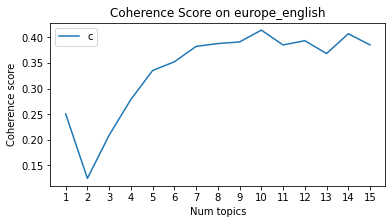

In [85]:
# Show graph

#x = range(start, limit, step)

x = list_num_topics
plt.figure(figsize=(6,3))
plt.title("Coherence Score on "+region)
plt.plot(x, coherence_values)


plt.xlabel("Num topics")
plt.ylabel("Coherence score")
plt.xticks(x, x)

plt.legend(("coherence_values"), loc='best')
plt.show()

In [86]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.2505
Num Topics = 2  has Coherence Value of 0.1247
Num Topics = 3  has Coherence Value of 0.209
Num Topics = 4  has Coherence Value of 0.2787
Num Topics = 5  has Coherence Value of 0.3352
Num Topics = 6  has Coherence Value of 0.3521
Num Topics = 7  has Coherence Value of 0.3821
Num Topics = 8  has Coherence Value of 0.3877
Num Topics = 9  has Coherence Value of 0.3908
Num Topics = 10  has Coherence Value of 0.4139
Num Topics = 11  has Coherence Value of 0.3849
Num Topics = 12  has Coherence Value of 0.3932
Num Topics = 13  has Coherence Value of 0.3682
Num Topics = 14  has Coherence Value of 0.4068
Num Topics = 15  has Coherence Value of 0.385


In [87]:
#save information for later
dict_models = dict()
dict_models['model_list'] = model_list
dict_models['coherence_values'] = coherence_values



In [88]:
import pickle


with open('coherence_and_model_lists_europe_dataset.pkl', 'wb') as handle:
    pickle.dump(dict_models, handle, protocol=4)

#  Seleccionar el mejor modelo de los ya realizados

In [91]:
import pickle



with open('lists_of_topic_models/coherence_and_model_lists_europe_dataset.pkl', 'rb') as handle:
    dict_models = pickle.load(handle)   

In [110]:
#ojo, revisar bien que pertenezca el numerod e topicos
ldamallet = dict_models['model_list'][5]

# [Saltar] Building LDA Mallet Model

El algoritmo detras de Mallet debiese dar mejores resultados que Gensim

In [ ]:
#colocar el mejor numero de topicos segun lo obtenido en el punto anterior
num_topics = 4

In [ ]:
start = time.time()


ldamallet = LdaMallet(path_to_mallet_binary, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=1)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
# Show Topics
#docu : https://www.pydoc.io/pypi/gensim-3.2.0/autoapi/models/wrappers/ldamallet/index.html
pprint(ldamallet.show_topics(formatted=False, num_words=30))


### visualize topics with PyLdaVIS

In [111]:
prueba = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)


In [112]:
pyLDAvis.enable_notebook()


In [113]:
vis = pyLDAvis.gensim.prepare(prueba, corpus,id2word, mds='pcoa', sort_topics=False, R=30)


c:\users\gonza\tesisenv\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
c:\users\gonza\tesisenv\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
c:\users\gonza\tesisenv\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [114]:
pyLDAvis.display(vis)

# Visualize results using topicVisExplorer

In [115]:
lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [116]:
#with this code we get the full matrix of topic-documents contribution
matrix_documents_topic_contribution, _ = lda_model.inference(corpus)
matrix_documents_topic_contribution /= matrix_documents_topic_contribution.sum(axis=1)[:, None]
matrix_documents_topic_contribution = pd.DataFrame(matrix_documents_topic_contribution)
matrix_documents_topic_contribution.head()

,0,1,2,3,4,5
0,0.175531,0.152022,0.137256,0.216722,0.150508,0.167962
1,0.175133,0.141271,0.242835,0.141243,0.141243,0.158275
2,0.163399,0.163399,0.183007,0.163399,0.163399,0.163399
3,0.176404,0.157247,0.170917,0.154393,0.186718,0.154321
4,0.157233,0.213825,0.157233,0.157233,0.157244,0.157233


In [117]:
contents = pd.Series(df['texto_completo']).reset_index(drop=True)

In [118]:
matrix_documents_topic_contribution = pd.concat([matrix_documents_topic_contribution, contents], axis=1)


In [119]:
matrix_documents_topic_contribution.head()

,0,1,2,3,4,5,texto_completo
0,0.175531,0.152022,0.137256,0.216722,0.150508,0.167962,"meet our newest product: the transparent camhatch webcam cover! we've combined everything you loved about the matte black version with the transparency of mark zuckerberg. protect your privacy without having to change the appearance of your laptop, tablet or smartphone. <linkremoved>"
1,0.175133,0.141271,0.242835,0.141243,0.141243,0.158275,"<usernameremoved> this week has been the most #triggered i've seen lefties since trump won (sadly, we have #maybot &amp; amber dudd on other side) friends! <linkremoved>"
2,0.163399,0.163399,0.183007,0.163399,0.163399,0.163399,pulitzer prize for this lady. investigative journalism at it's finest. <linkremoved>
3,0.176404,0.157247,0.170917,0.154393,0.186718,0.154321,"theres no more secrecy, confident and privacy and no protection of personal data. our lives are traded on the open market! <linkremoved>"
4,0.157233,0.213825,0.157233,0.157233,0.157244,0.157233,aggregateiq: the obscure canadian tech firm and the brexit data riddle <linkremoved>


### topic similarity metric  

In [120]:
# Choose the # top keywords and # top documents a considerar en la metrica

topn_terms = 20
topk_documents = 20
relevance_lambda = 0.6 

ruta_word_embedding = '../data/embedding_english_europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.model'
word_embedding_model = gensim.models.Word2Vec.load(ruta_word_embedding)

In [121]:
import sys
sys.path.insert(0,'..')


In [124]:
import topicvisexplorer
import importlib
warnings.filterwarnings('ignore')
importlib.reload(topicvisexplorer)

vis = topicvisexplorer.TopicVisExplorer("borrar_nombre")


In [ ]:
#preparing the visualization
vis.prepare_single_corpus( lda_model, corpus, id2word, matrix_documents_topic_contribution, topic_similarity_matrix)


In [125]:
#calculating topic similarity matrix
topic_similarity_matrix = vis.calculate_topic_similarity_on_single_corpus(word_embedding_model, lda_model, corpus, id2word, matrix_documents_topic_contribution,topn_terms, topk_documents, relevance_lambda)


we are calculating a new topic similarity matirx
Using Prepared Data script - sort_topics False
Calculating for different omegas


In [126]:
#preparing the visualization
vis.prepare_single_corpus( lda_model, corpus, id2word, matrix_documents_topic_contribution, topic_similarity_matrix)


In [127]:
#save data
#For scenario1: ../models_output/single_corpus_airlines_dataset.pkl


vis.save_single_corpus_data("../models_output/single_corpus_europe_dataset_topics_"+str(lda_model.num_topics)+".pkl")

Single corpus data saved sucessfully
